In [1]:
from collections import Counter

import pandas as pd
from sklearn.preprocessing import scale
import numpy as np

import seaborn as sb
sb.set(font_scale=.6)
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('grayscale')
sb.set_style("white")
sb.set_palette("Greys_r")

import matplotlib.pyplot as plt
#plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = 'Greys_r'

from matplotlib.font_manager import FontProperties
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Roboto Condensed']
from IPython.display import display

import bambi as bmb
import arviz as az

## General statistics

In [2]:
meta_df = pd.read_excel('../data/metadata_corrected.xlsx')
meta_df = meta_df[meta_df['exclude'] != 'x']
meta_df = meta_df[meta_df['genre'] == 'Epiek']

In [3]:
meta_df['author'].value_counts(dropna=False)

author
NaN                      164
Lodewijk van Velthem      14
Jacob van Maerlant         9
Philip Utenbroeke          8
Jan van Boendale           6
Augustijnken               2
Heraut Beyeren             1
Jan de Weert               1
Melis Stoke                1
Jan van Heelu              1
Diederic van Assenede      1
Loy Latewaert              1
Hendrik van Veldeke        1
Lambertus Goetman          1
Calfstaf en Noydekin       1
Dirc Potter                1
Willem                     1
Penninc                    1
Pieter Vostaert            1
Segher Diengotgaf          1
Name: count, dtype: int64

In [4]:
meta_df['subgenre'].value_counts()

subgenre
Karel             54
Didactiek         42
Ridder            38
Historiografie    35
Arthur            17
Heiligenleven     11
Kruisvaart        10
Religie            7
Dier               3
Name: count, dtype: int64

## Statistics combinations

In [5]:
df = pd.read_excel('../figures/statistics.xlsx')

df['subgenre'] = (df['subgenre1'] == df['subgenre2']).astype('category')
df['author'] = (df['author1'] == df['author2']).astype('category')
df['hits'] = df['hits'].astype('int')
df['l1'] = df['l1'].astype('int')
df['l2'] = df['l2'].astype('int')
print(df['author'].value_counts())
print(df['subgenre'].value_counts())

author
False    12823
True        57
Name: count, dtype: int64
subgenre
False    10803
True      2077
Name: count, dtype: int64


In [6]:
df['norm'] = df['hits'] / (df['l1'] * df['l2']) * 1000
df['norm_square'] = df['hits'] / np.sqrt(df['l1'] * df['l2'])

df

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author,norm,norm_square
0,Noch meer van wiven,Van der wive wonderlijcheit (lange versie),111,225,149,Epiek,Epiek,Didactiek,Didactiek,NaN,NaN,0.005966,True,False,5.965966,0.942830
1,Gwidekijn van Sassen,Ongeïdentificeerd (4),199,139,35,Epiek,Epiek,Karel,Karel,NaN,NaN,0.001265,True,False,1.265319,0.210443
2,Ongeïdentificeerd (4),Roman van Cassant,139,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.001240,False,False,1.240387,0.078752
3,Gwidekijn van Sassen,Roman van Cassant,199,29,5,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.000866,False,False,0.866401,0.065818
4,Ongeïdentificeerd (4),Roman van Antiochië,139,168,16,Epiek,Epiek,Karel,Kruisvaart,NaN,NaN,0.000685,False,False,0.685166,0.104703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12875,Godevaerts kintshede,Van der wive wonderlijcheit (lange versie),55,225,0,Epiek,Epiek,Kruisvaart,Didactiek,NaN,NaN,0.000000,False,False,0.000000,0.000000
12876,Godevaerts kintshede,Van der manen zeden,55,301,0,Epiek,Epiek,Kruisvaart,Didactiek,NaN,NaN,0.000000,False,False,0.000000,0.000000
12877,Godevaerts kintshede,Van den vijf vrouden,55,72,0,Epiek,Epiek,Kruisvaart,Didactiek,NaN,NaN,0.000000,False,False,0.000000,0.000000
12878,Godevaerts kintshede,Van Saladijn,55,289,0,Epiek,Epiek,Kruisvaart,Kruisvaart,NaN,Hein van Aken,0.000000,True,False,0.000000,0.000000


In [7]:
len(df[(df['author1'].isna()) | (df['author2'].isna())])

12214

## Hit ratio

In [8]:
df.sort_values('norm_square', ascending=False).head(10)

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author,norm,norm_square
71,Brabantsche yeesten (B7),Grimbergse oorlog,18188,12186,53540,Epiek,Epiek,Historiografie,Historiografie,NaN,NaN,0.000242,True,False,0.241564,3.596295
75,Brabantsche yeesten (B6),Brabantsche yeesten (B7),11987,18188,50630,Epiek,Epiek,Historiografie,Historiografie,NaN,NaN,0.000232,True,False,0.232227,3.428942
61,Brabantsche yeesten (B7),Rijmkroniek van Woeringen,18188,9538,44337,Epiek,Epiek,Historiografie,Historiografie,NaN,Jan van Heelu,0.000256,True,False,0.255578,3.366241
44,Grimbergse oorlog,Rijmkroniek van Woeringen,12186,9538,34910,Epiek,Epiek,Historiografie,Historiografie,NaN,Jan van Heelu,0.000300,True,False,0.300353,3.238103
760,Rijmbijbel,Spiegel historiael (P1-P4),35981,88713,167067,Epiek,Epiek,Religie,Historiografie,Jacob van Maerlant,Jacob van Maerlant,0.000052,False,True,0.052340,2.957062
482,Historie van Troyen,Rijmbijbel,37582,35981,99599,Epiek,Epiek,Ridder,Religie,Jacob van Maerlant,Jacob van Maerlant,0.000074,False,True,0.073655,2.708497
119,Brabantsche yeesten (B6),Grimbergse oorlog,11987,12186,27817,Epiek,Epiek,Historiografie,Historiografie,NaN,NaN,0.000190,True,False,0.190431,2.301571
367,Brabantsche yeesten (B7),Rijmbijbel,18188,35981,57727,Epiek,Epiek,Historiografie,Religie,NaN,Jacob van Maerlant,0.000088,False,False,0.088211,2.256576
102,Brabantsche yeesten (B6),Rijmkroniek van Woeringen,11987,9538,22868,Epiek,Epiek,Historiografie,Historiografie,NaN,Jan van Heelu,0.000200,True,False,0.200014,2.138672
316,Rijmbijbel,Rijmkroniek van Woeringen,35981,9538,33629,Epiek,Epiek,Religie,Historiografie,Jacob van Maerlant,Jan van Heelu,0.000098,False,False,0.097990,1.815301


In [9]:
df.sort_values('norm_square', ascending=False).head(10)

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author,norm,norm_square
71,Brabantsche yeesten (B7),Grimbergse oorlog,18188,12186,53540,Epiek,Epiek,Historiografie,Historiografie,NaN,NaN,0.000242,True,False,0.241564,3.596295
75,Brabantsche yeesten (B6),Brabantsche yeesten (B7),11987,18188,50630,Epiek,Epiek,Historiografie,Historiografie,NaN,NaN,0.000232,True,False,0.232227,3.428942
61,Brabantsche yeesten (B7),Rijmkroniek van Woeringen,18188,9538,44337,Epiek,Epiek,Historiografie,Historiografie,NaN,Jan van Heelu,0.000256,True,False,0.255578,3.366241
44,Grimbergse oorlog,Rijmkroniek van Woeringen,12186,9538,34910,Epiek,Epiek,Historiografie,Historiografie,NaN,Jan van Heelu,0.000300,True,False,0.300353,3.238103
760,Rijmbijbel,Spiegel historiael (P1-P4),35981,88713,167067,Epiek,Epiek,Religie,Historiografie,Jacob van Maerlant,Jacob van Maerlant,0.000052,False,True,0.052340,2.957062
482,Historie van Troyen,Rijmbijbel,37582,35981,99599,Epiek,Epiek,Ridder,Religie,Jacob van Maerlant,Jacob van Maerlant,0.000074,False,True,0.073655,2.708497
119,Brabantsche yeesten (B6),Grimbergse oorlog,11987,12186,27817,Epiek,Epiek,Historiografie,Historiografie,NaN,NaN,0.000190,True,False,0.190431,2.301571
367,Brabantsche yeesten (B7),Rijmbijbel,18188,35981,57727,Epiek,Epiek,Historiografie,Religie,NaN,Jacob van Maerlant,0.000088,False,False,0.088211,2.256576
102,Brabantsche yeesten (B6),Rijmkroniek van Woeringen,11987,9538,22868,Epiek,Epiek,Historiografie,Historiografie,NaN,Jan van Heelu,0.000200,True,False,0.200014,2.138672
316,Rijmbijbel,Rijmkroniek van Woeringen,35981,9538,33629,Epiek,Epiek,Religie,Historiografie,Jacob van Maerlant,Jan van Heelu,0.000098,False,False,0.097990,1.815301


In [10]:
intergenre = df.groupby(['subgenre1', 'subgenre2'])['norm'].median().reset_index().rename_axis(None, axis=1)
intergenre.sort_values('norm', ascending=False)

,subgenre1,subgenre2,norm
40,Historiografie,Historiografie,0.035647
41,Historiografie,Karel,0.030003
50,Karel,Karel,0.025784
59,Kruisvaart,Karel,0.021083
58,Kruisvaart,Historiografie,0.019939
...,...,...,...
21,Dier,Heiligenleven,0.002242
55,Kruisvaart,Didactiek,0.002195
15,Didactiek,Kruisvaart,0.001008
33,Heiligenleven,Kruisvaart,0.000000


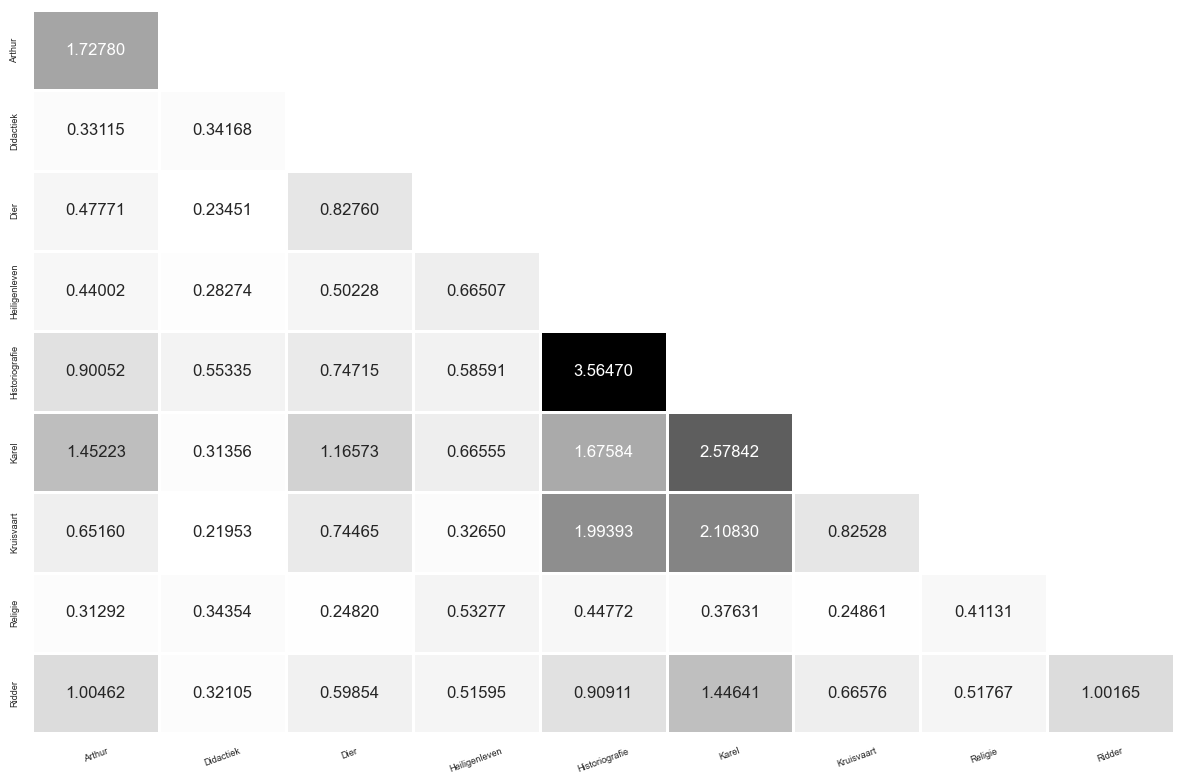

In [11]:
genres = sorted(set(list(intergenre['subgenre1']) + list(intergenre['subgenre2'])))
hits = np.zeros((len(genres), len(genres)))

for _, row in intergenre.iterrows():
    hits[genres.index(row['subgenre1']), genres.index(row['subgenre2'])] = row['norm'] * 100
    hits[genres.index(row['subgenre2']), genres.index(row['subgenre1'])] = row['norm'] * 100

hits[np.triu_indices(hits.shape[1], k=1)] = np.nan
hits = pd.DataFrame(hits, index=genres, columns=genres)
fig, ax = plt.subplots(figsize=(12, 8))

sb.set(font_scale=1)
sb.set_style("whitegrid", {'axes.grid' : False})
ax = sb.heatmap(hits, annot=True, cmap='Greys', cbar=False,
                linewidths=1, linecolor='white', fmt='.5f')
ax.tick_params(left=False, bottom=False)
for l in plt.gca().lines:
    l.set_alpha(0.3)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(f'../figures/genre_dist.png', dpi=500);

In [12]:
df[(df['l1'] > 2000) & (df['l2'] > 2000) &
   (df['subgenre1'] != 'Historiografie') &
   (df['subgenre2'] != 'Historiografie') &
   (df['subgenre1'] != df['subgenre2']) &
   (df['author1'].isna()) & (df['author2'].isna())
  ].sort_values('norm', ascending=False).head(10)

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author,norm,norm_square
1416,Limborch,Roman der Lorreinen II,21847,9895,6918,Epiek,Epiek,Ridder,Karel,NaN,NaN,0.000032,False,False,0.032002,0.470519
1607,Ferguut,Renout van Montalbaen,5602,2552,407,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.000028,False,False,0.028469,0.107642
1714,Limborch,Renout van Montalbaen,21847,2552,1480,Epiek,Epiek,Ridder,Karel,NaN,NaN,0.000027,False,False,0.026545,0.198210
1794,Renout van Montalbaen,Walewein ende Keye,2552,2809,182,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.000025,False,False,0.025389,0.067976
1856,Der mannen ende vrouwen heimelijcheit,Roman der Lorreinen II,2328,9895,569,Epiek,Epiek,Didactiek,Karel,NaN,NaN,0.000025,False,False,0.024701,0.118553
1876,Ferguut,Roman der Lorreinen II,5602,9895,1355,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.000024,False,False,0.024444,0.181995
1960,Der mannen ende vrouwen heimelijcheit,Ferguut,2328,5602,307,Epiek,Epiek,Didactiek,Arthur,NaN,NaN,0.000024,False,False,0.023540,0.085011
1980,Moriaen,Renout van Montalbaen,4482,2552,266,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.000023,False,False,0.023256,0.078651
1989,Perchevael,Renout van Montalbaen,3654,2552,216,Epiek,Epiek,Arthur,Karel,NaN,NaN,0.000023,False,False,0.023164,0.070734
2035,Renout van Montalbaen,Wrake van Ragisel,2552,2066,120,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.000023,False,False,0.022760,0.052261


For comparison:

In [13]:
trg = ['Moriaen', 'Lantsloot van der Haghedochte', 'Karel ende Elegast']
trg_df = df[(df['t1'].isin(trg)) & (df['t2'].isin(trg))]
th = trg_df['norm'].mean()
trg_df.sort_values('norm')

,t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,subgenre,author,norm,norm_square
1662,Karel ende Elegast,Lantsloot van der Haghedochte,1363,5837,219,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.000028,False,False,0.027527,0.077643
1339,Karel ende Elegast,Moriaen,1363,4482,204,Epiek,Epiek,Karel,Arthur,NaN,NaN,0.000033,False,False,0.033394,0.082537
862,Lantsloot van der Haghedochte,Moriaen,5837,4482,1226,Epiek,Epiek,Arthur,Arthur,NaN,NaN,0.000047,True,False,0.046863,0.239695


## Statistics

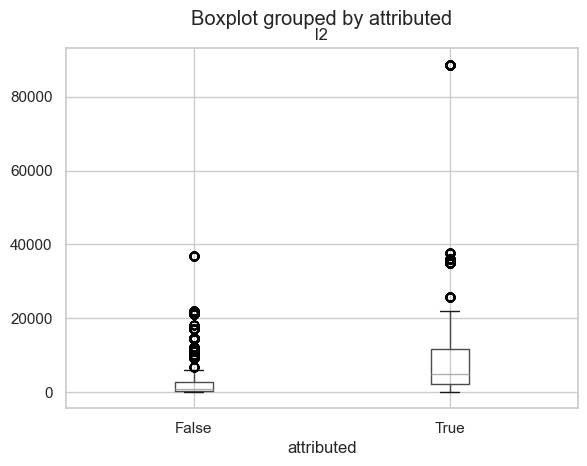

In [14]:
df['attributed'] = ~df['author2'].isna()
df.boxplot('l2', 'attributed');

In [15]:
df_stats = df.copy()

df_stats = df[df['author1'].notna()]
df_stats = df_stats[df_stats['author2'].notna()]

def compare_na(v1, v2):
    same = (v1 == v2) | (v1.isna() & v2.isna())
    same = same.fillna(False)
    return same

df_stats['author'] = compare_na(df_stats['author1'], df_stats['author2']).astype('category')
df_stats['genre'] = compare_na(df_stats['subgenre1'], df_stats['subgenre2']).astype('category')

len(df_stats)

666

count    666.000000
mean       0.014689
std        0.030425
min        0.000000
25%        0.003436
50%        0.007449
75%        0.014790
max        0.582291
Name: norm, dtype: float64


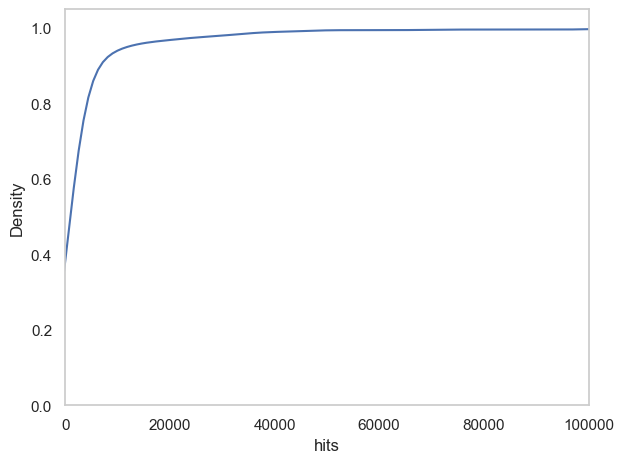

In [16]:
print(df_stats['norm'].describe())
ax = sb.kdeplot(data=df_stats['hits'], cumulative=True)
ax.set_xlim(0, 100000)
plt.tight_layout()

In [17]:
def effects_plot(model, results, predictors):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=120)
    plot_output = bmb.interpret.plot_predictions(
        model, 
        results, 
        predictors, 
        ax=ax,
        prob=.89
    )

    # Set colors and make plot points larger
    for i, collection in enumerate(ax.collections):
        collection.set_color('black' if i < 2 else 'gray')
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([100])  # Larger points in the plot

    legend_elements = []
    labels = [
        f'Same {predictors[-1]}',
        f'Different {predictors[-1]}'
    ]

    # Create larger markers for legend
    for i in range(2):
        legend_elements.append(plt.Line2D([0], [0], 
                                        color='black' if i == 0 else 'gray', 
                                        marker='o', 
                                        markersize=10,  # Larger legend markers
                                        linestyle='None'))

    ax.legend(legend_elements, labels, 
            loc='center left',
            bbox_to_anchor=(1.05, 0.5))

    plt.tight_layout()
    fig.subplots_adjust(right=0.85)

In [18]:
df_stats['log_exposure'] = np.log(np.sqrt(df_stats['l1'] * df_stats['l2']))

In [19]:
m1 = bmb.Model('hits ~ log_exposure', data=df_stats, family='negativebinomial')
fit1 = m1.fit(idata_kwargs=dict(log_likelihood = True))

m2 = bmb.Model('hits ~ author + log_exposure', data=df_stats, family='negativebinomial')
fit2 = m2.fit(idata_kwargs=dict(log_likelihood = True))

m3 = bmb.Model('hits ~ genre + log_exposure', data=df_stats, family='negativebinomial')
fit3 = m3.fit(idata_kwargs=dict(log_likelihood = True))

m4 = bmb.Model('hits ~ genre + author + log_exposure', data=df_stats, family='negativebinomial')
fit4 = m4.fit(idata_kwargs=dict(log_likelihood = True))

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, log_exposure]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, author, log_exposure]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, genre, log_exposure]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, genre, author, log_exposure]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [20]:
compare_dict = {
    'exp': fit1,
    'exp + author': fit2,
    'exp + genre': fit3,
    'exp + genre + author': fit4,
}

loo_compare = az.compare(compare_dict, ic='loo')
loo_compare

/Users/mikekestemont/miniconda3/envs/mdu/lib/python3.12/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/mikekestemont/miniconda3/envs/mdu/lib/python3.12/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/mikekestemont/minic

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
exp + genre + author,0,-4520.219465,14.317841,0.000000,6.487097e-01,74.482678,0.000000,True,log
exp + genre,1,-4523.043539,11.946405,2.824074,1.735059e-01,73.453988,4.276391,True,log
exp + author,2,-4574.208217,16.114649,53.988751,2.415645e-16,80.791409,19.629423,True,log
exp,3,-4580.482961,14.015037,60.263496,1.777844e-01,79.152641,18.774530,True,log


In [21]:
az.summary(fit4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.938,0.048,0.848,1.031,0.001,0.000,6082.0,3452.0,1.0
Intercept,-13.319,0.360,-13.944,-12.599,0.006,0.004,3946.0,3131.0,1.0
genre[True],1.062,0.112,0.841,1.260,0.002,0.001,3932.0,3030.0,1.0
author[True],0.436,0.146,0.173,0.711,0.002,0.001,5397.0,3276.0,1.0
log_exposure,2.217,0.041,2.138,2.292,0.001,0.000,4109.0,3293.0,1.0


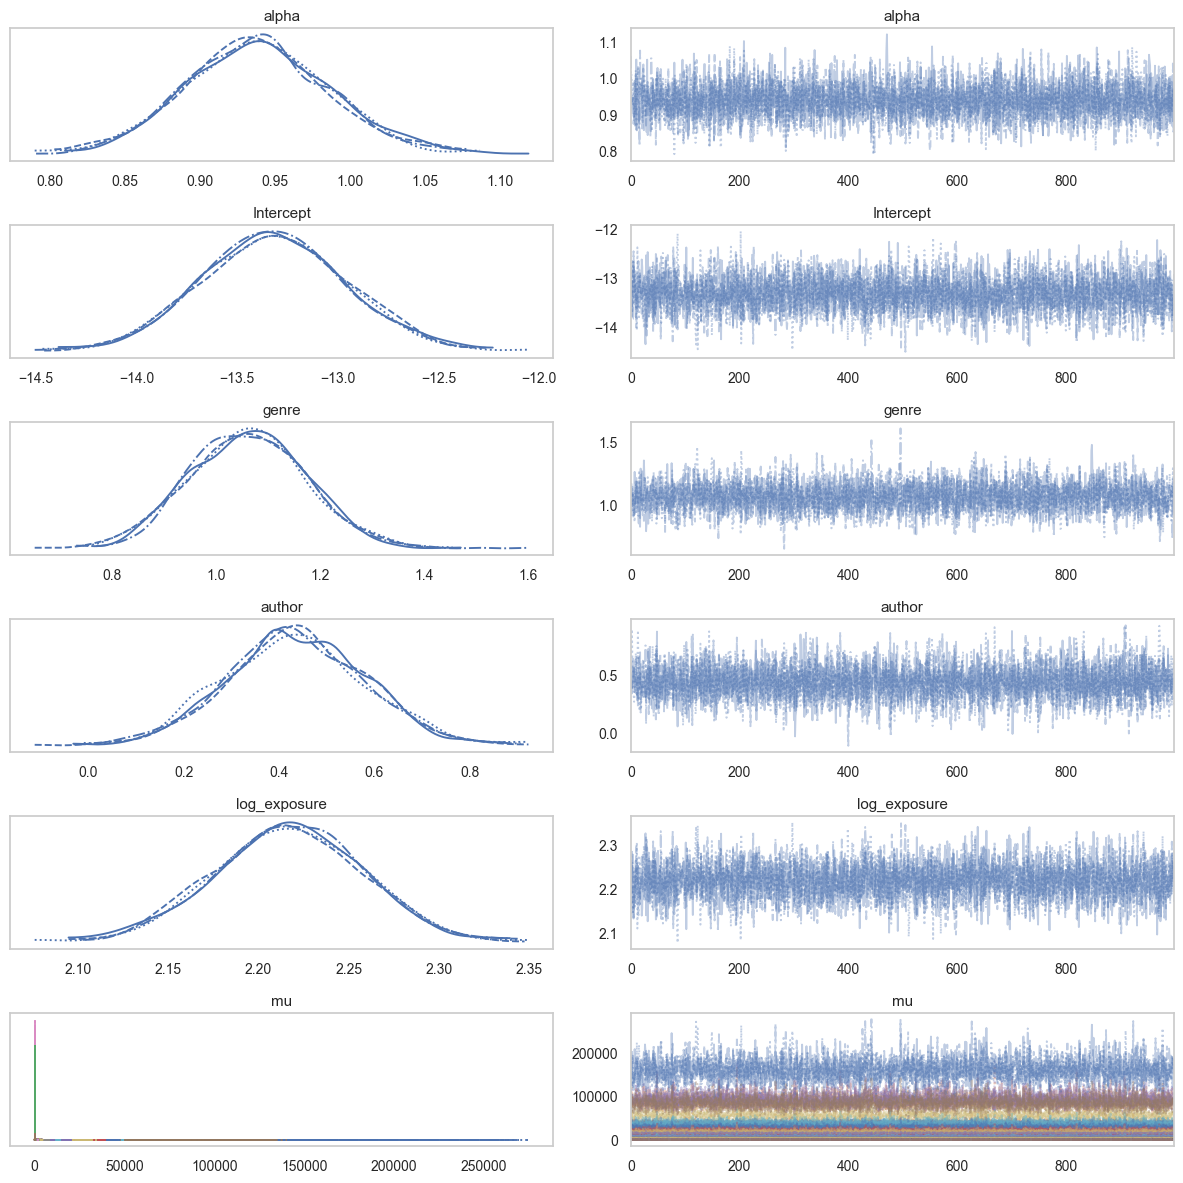

In [27]:
az.plot_trace(fit4)
plt.tight_layout();

Default computed for conditional variable: author, genre
Default computed for unspecified variable: log_exposure
Default computed for conditional variable: log_exposure
Default computed for unspecified variable: author, genre


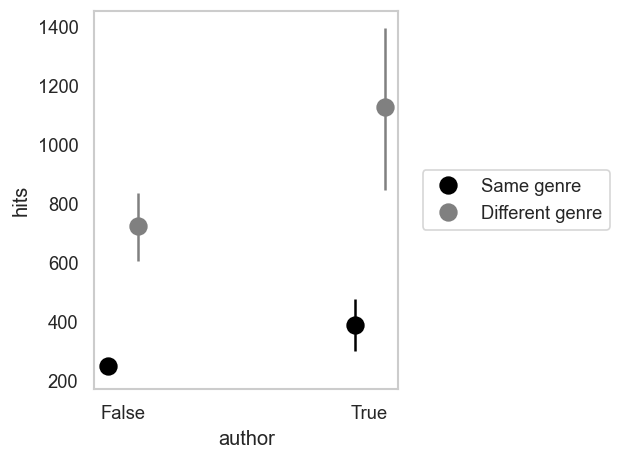

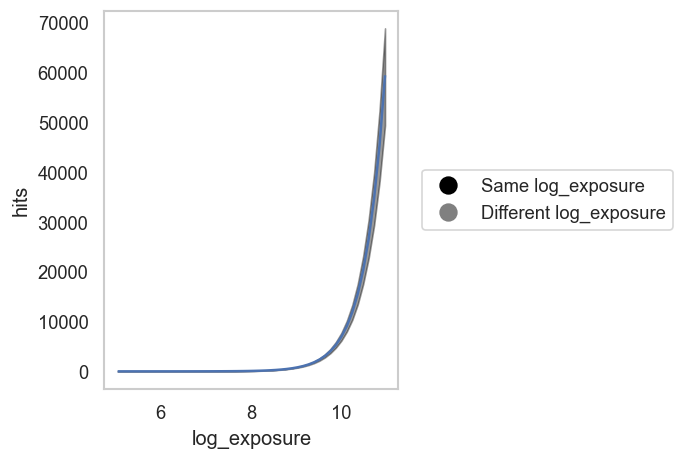

In [23]:
effects_plot(model=m4, results=fit4, predictors = ["author", "genre"])
effects_plot(model=m4, results=fit4, predictors = ["log_exposure"])

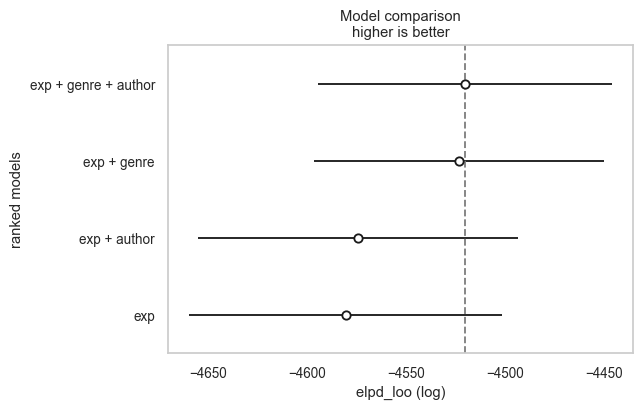

In [24]:
az.plot_compare(loo_compare);

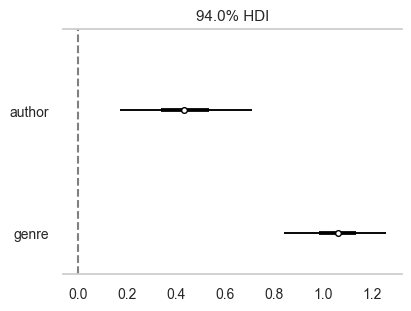

In [25]:
fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
az.plot_forest(fit4, 
               kind="forestplot", hdi_prob=0.94, combined=True, ax=ax,
               var_names=["author", "genre"],
               textsize=10, colors=["black"])
plt.axvline(0, c='grey', ls='--');

/var/folders/6j/pn9nz6b55j3fpdt8gtj50crm0000gn/T/ipykernel_51091/2165123903.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout();
/Users/mikekestemont/miniconda3/envs/mdu/lib/python3.12/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/mikekestemont/miniconda3/envs/mdu/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


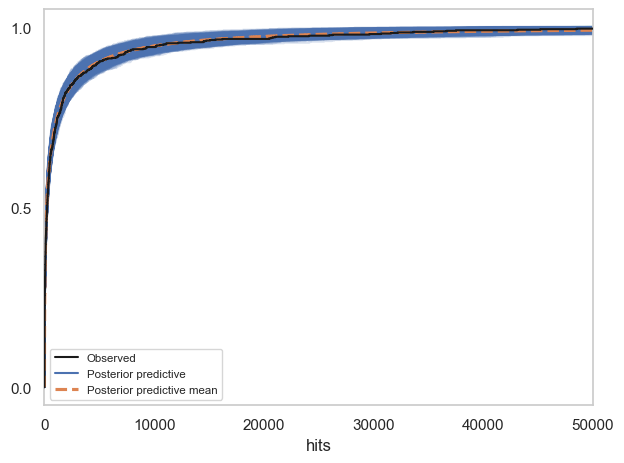

In [26]:
m4.predict(fit4, kind='response')
ax = az.plot_ppc(fit4, kind='cumulative')
ax.set_xlim(0, 50000)
plt.tight_layout();